In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
a = pd.read_csv("../기상청공모전/data/total_data.csv")

In [3]:
a1 = a.iloc[:,[0,2,3,-1]]

In [4]:
a1

,num,latitude,longitude,anchor_drag
0,1001,35.461190,129.438732,0
1,1001,35.461160,129.439545,0
2,1001,35.461472,129.439878,0
3,1001,35.461688,129.439792,0
4,1001,35.461708,129.439733,0
...,...,...,...,...
682471,4087,35.053083,129.061333,1
682472,4087,35.053083,129.061333,1
682473,4087,35.053117,129.061400,1
682474,4087,35.053117,129.061417,1


In [5]:
_order = ["anchor_drag", "num", "latitude", "longitude"]

In [6]:
a1 = a1.reindex(columns = _order)
a1

,anchor_drag,num,latitude,longitude
0,0,1001,35.461190,129.438732
1,0,1001,35.461160,129.439545
2,0,1001,35.461472,129.439878
3,0,1001,35.461688,129.439792
4,0,1001,35.461708,129.439733
...,...,...,...,...
682471,1,4087,35.053083,129.061333
682472,1,4087,35.053083,129.061333
682473,1,4087,35.053117,129.061400
682474,1,4087,35.053117,129.061417


In [7]:
for i in range(1,len(a1)):
    a1.loc[i,'d_lati'] = a1.loc[i,'latitude'] - a1.loc[i-1,'latitude']
    a1.loc[i,'d_long'] = a1.loc[i,'longitude'] - a1.loc[i-1,'longitude']

In [8]:
a1

,anchor_drag,num,latitude,longitude,d_lati,d_long
0,0,1001,35.461190,129.438732,NaN,NaN
1,0,1001,35.461160,129.439545,-0.000030,0.000813
2,0,1001,35.461472,129.439878,0.000312,0.000333
3,0,1001,35.461688,129.439792,0.000216,-0.000086
4,0,1001,35.461708,129.439733,0.000020,-0.000059
...,...,...,...,...,...,...
682471,1,4087,35.053083,129.061333,0.000033,0.000016
682472,1,4087,35.053083,129.061333,0.000000,0.000000
682473,1,4087,35.053117,129.061400,0.000034,0.000067
682474,1,4087,35.053117,129.061417,0.000000,0.000017


In [9]:
for i in range(1,len(a1)):
    a1.loc[i,'d_d_lati'] = a1.loc[i,'d_lati'] - a1.loc[i-1,'d_lati']
    a1.loc[i,'d_d_long'] = a1.loc[i,'d_lati'] - a1.loc[i-1,'d_lati']

In [10]:
a1

,anchor_drag,num,latitude,longitude,d_lati,d_long,d_d_lati,d_d_long
0,0,1001,35.461190,129.438732,NaN,NaN,NaN,NaN
1,0,1001,35.461160,129.439545,-0.000030,0.000813,NaN,NaN
2,0,1001,35.461472,129.439878,0.000312,0.000333,0.000342,0.000342
3,0,1001,35.461688,129.439792,0.000216,-0.000086,-0.000096,-0.000096
4,0,1001,35.461708,129.439733,0.000020,-0.000059,-0.000196,-0.000196
...,...,...,...,...,...,...,...,...
682471,1,4087,35.053083,129.061333,0.000033,0.000016,-0.000017,-0.000017
682472,1,4087,35.053083,129.061333,0.000000,0.000000,-0.000033,-0.000033
682473,1,4087,35.053117,129.061400,0.000034,0.000067,0.000034,0.000034
682474,1,4087,35.053117,129.061417,0.000000,0.000017,-0.000034,-0.000034


In [11]:
ship_num = a1.iloc[:,1].unique()

In [12]:
_drop = []
for i in ship_num:
    k = a1[a1["num"] == i].index[0]
    _drop.append(k)
    k += 1
    _drop.append(k)

In [13]:
_drop

[0,
 1,
 457,
 458,
 1006,
 1007,
 5129,
 5130,
 5416,
 5417,
 5669,
 5670,
 6286,
 6287,
 6382,
 6383,
 8394,
 8395,
 8870,
 8871,
 9548,
 9549,
 10180,
 10181,
 11526,
 11527,
 11902,
 11903,
 12373,
 12374,
 12785,
 12786,
 27006,
 27007,
 27428,
 27429,
 28449,
 28450,
 30117,
 30118,
 30523,
 30524,
 31015,
 31016,
 31526,
 31527,
 31986,
 31987,
 32462,
 32463,
 32831,
 32832,
 33028,
 33029,
 33252,
 33253,
 33737,
 33738,
 34018,
 34019,
 42006,
 42007,
 42117,
 42118,
 42348,
 42349,
 42463,
 42464,
 42544,
 42545,
 42847,
 42848,
 43377,
 43378,
 49808,
 49809,
 56308,
 56309,
 56367,
 56368,
 56909,
 56910,
 57576,
 57577,
 57898,
 57899,
 57974,
 57975,
 59224,
 59225,
 60805,
 60806,
 61050,
 61051,
 61179,
 61180,
 72262,
 72263,
 72394,
 72395,
 72542,
 72543,
 72989,
 72990,
 73313,
 73314,
 73593,
 73594,
 78226,
 78227,
 78631,
 78632,
 79057,
 79058,
 79537,
 79538,
 79654,
 79655,
 79748,
 79749,
 80282,
 80283,
 80815,
 80816,
 81110,
 81111,
 81285,
 81286,
 81899

In [14]:
len(_drop)

1036

In [15]:
a1 = a1[~a1.index.isin(_drop)]

In [16]:
a1

,anchor_drag,num,latitude,longitude,d_lati,d_long,d_d_lati,d_d_long
2,0,1001,35.461472,129.439878,0.000312,0.000333,0.000342,0.000342
3,0,1001,35.461688,129.439792,0.000216,-0.000086,-0.000096,-0.000096
4,0,1001,35.461708,129.439733,0.000020,-0.000059,-0.000196,-0.000196
5,0,1001,35.461720,129.439708,0.000012,-0.000025,-0.000008,-0.000008
6,0,1001,35.461733,129.439717,0.000013,0.000009,0.000001,0.000001
...,...,...,...,...,...,...,...,...
682471,1,4087,35.053083,129.061333,0.000033,0.000016,-0.000017,-0.000017
682472,1,4087,35.053083,129.061333,0.000000,0.000000,-0.000033,-0.000033
682473,1,4087,35.053117,129.061400,0.000034,0.000067,0.000034,0.000034
682474,1,4087,35.053117,129.061417,0.000000,0.000017,-0.000034,-0.000034


In [17]:
# XGBoost
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score

X = a1.iloc[:, 2:]  # 세번째 열부터 마지막 열까지 입력값
y = a1.iloc[:, 0]  # 첫번째 열이 정답열


# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# XGBoost 데이터셋 생성
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# XGBoost 모델 학습
params = {'objective': 'binary:logistic', 'eval_metric': 'logloss'}
num_rounds = 100  # 반복 횟수 설정

model = xgb.train(params, dtrain, num_rounds)

# 테스트 데이터 예측
y_pred = model.predict(dtest)
y_pred_binary = [1 if y >= 0.5 else 0 for y in y_pred]

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred_binary)
print("정확도:", accuracy)

정확도: 0.9899697698990373


In [18]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred_binary))

0.7160955347871236


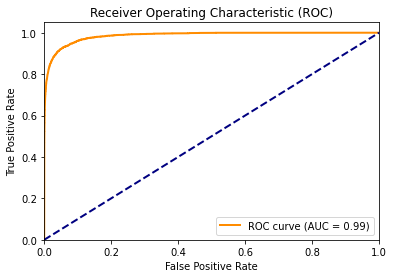

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc

# XGBoost 모델 예측 확률
y_pred_proba = model.predict(dtest)

# 양성 클래스의 예측 확률 추출
pos_proba = y_pred_proba

# 실제값과 비교할 양성 클래스의 실제 레이블
y_true = np.array(y_test)

# ROC 곡선 계산
fpr, tpr, thresholds = roc_curve(y_true, pos_proba)
roc_auc = auc(fpr, tpr)

# ROC 곡선 그리기
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [21]:
from sklearn.metrics import confusion_matrix

# 혼동 행렬 계산
cm = confusion_matrix(y_test, y_pred_binary)

# CSI 계산
tp = cm[1, 1]  # True Positive
tn = cm[0, 0]  # True Negative
fp = cm[0, 1]  # False Positive
fn = cm[1, 0]  # False Negative

csi = tp / (tp + fn + fp)
print("CSI 점수:", csi)

CSI 점수: 0.5577483015205436
